In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [ ]:
ct = make_column_transformer((MinMaxScaler(),["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore", ["sex", "smoker", "region"]))
                            
)

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                            (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker","region"])
)

# Create X and y set
X = insurance.drop(["charges"], axis=1)
y = insurance["charges"]

# Build train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [6]:
# Visualization
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [9]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [10]:
tf.random.set_seed(42)

In [13]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.3848 - mae: 13343.3848
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.3535 - mae: 13334.3535
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13311.6406 - mae: 13311.6406
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13264.8252 - mae: 13264.8252
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13183.1826 - mae: 13183.1826
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13055.7979 - mae: 13055.7979
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12872.3467 - mae: 12872.3467
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12622.7832 - mae: 12622.7832
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12296.9824 - mae: 12296.9824
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11891.63

34/34 [==============================] - 0s 2ms/step - loss: 3676.0364 - mae: 3676.0364
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 3672.9602 - mae: 3672.9602
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3666.9841 - mae: 3666.9841
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3663.7129 - mae: 3663.7129
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3661.7476 - mae: 3661.7476
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3659.8777 - mae: 3659.8777
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3656.9648 - mae: 3656.9648
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3654.5925 - mae: 3654.5925
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3653.2163 - mae: 3653.2163
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3651.4800 - mae: 3651.4800
Epo

In [12]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3433.9758 - mae: 3433.9758


[3433.975830078125, 3433.975830078125]

Text(0, 0.5, 'loss')

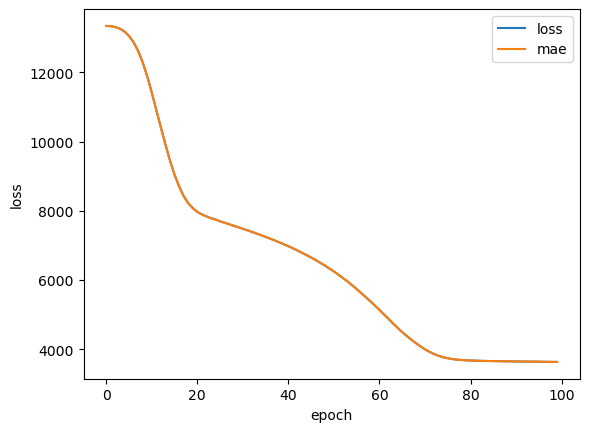

In [14]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.ylabel("loss")